# Noise Analysis Test

### Imports

In [9]:
from tescal.detcal import  Noise, TESnoise
import numpy as np
import matplotlib.pyplot as plt
from pycdms.plotting import compare_noise, plot_noise_sim
import seaborn as sns




### Load test data


In [2]:
pathToTraces = ''
traces_PT_on = np.load(pathToTraces+'traces.npy')




### Create noise object


In [3]:
#savePath = 'example_Figs/' #used for test, user should define new path for test so they don't save over these figs
savePath = '' #user needs to define new path

sampleRate = 625e3 #define sample rate
channels = [ 'PCS1' , 'PES1' , 'PFS1' , 'PAS2' , 'PBS2' , 'PES2' , 'PDS2' ] #define the channel names
g124_noise = Noise(traces_PT_on, sampleRate, channels) #initialize a noise object
g124_noise.name = 'G124 SLAC Run 37 Pulse Tube On'



### Calculate the PSD and corrCoeff

In [4]:
g124_noise.calculate_psd()
g124_noise.calculate_corrcoeff()
#g124_noise.calculate_csd()



## Calculate unCorrelated noise

In [ ]:
g124_noise.calculate_uncorr_noise()

### Test saving

In [6]:
#saveName = pathToTraces + g124_noise.name.replace(" ", "_") + '.pkl'
#g124_noise.save(pathToTraces)

In [7]:
#del g124_noise

In [ ]:
# with open(pathToTraces,'rb') as savefile:
#     g124_noise = pickle.load(savefile)

### Test plotting of PSD and corrCoeff

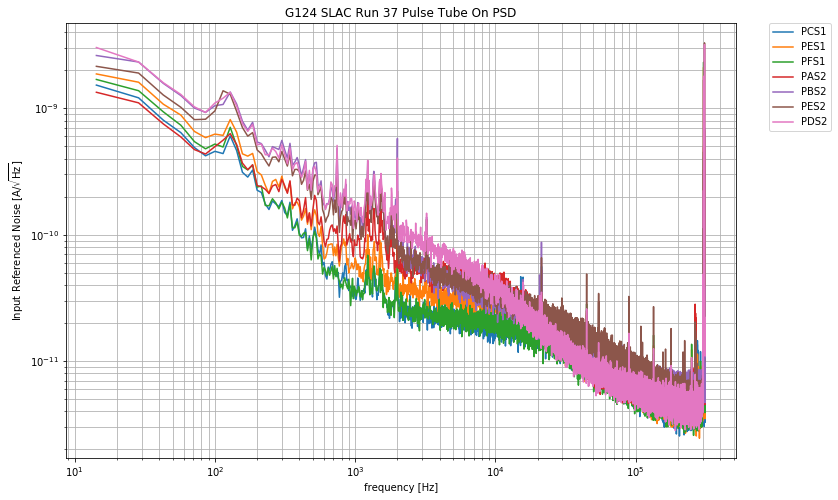

In [5]:
g124_noise.plot_psd(lgcoverlay=True)


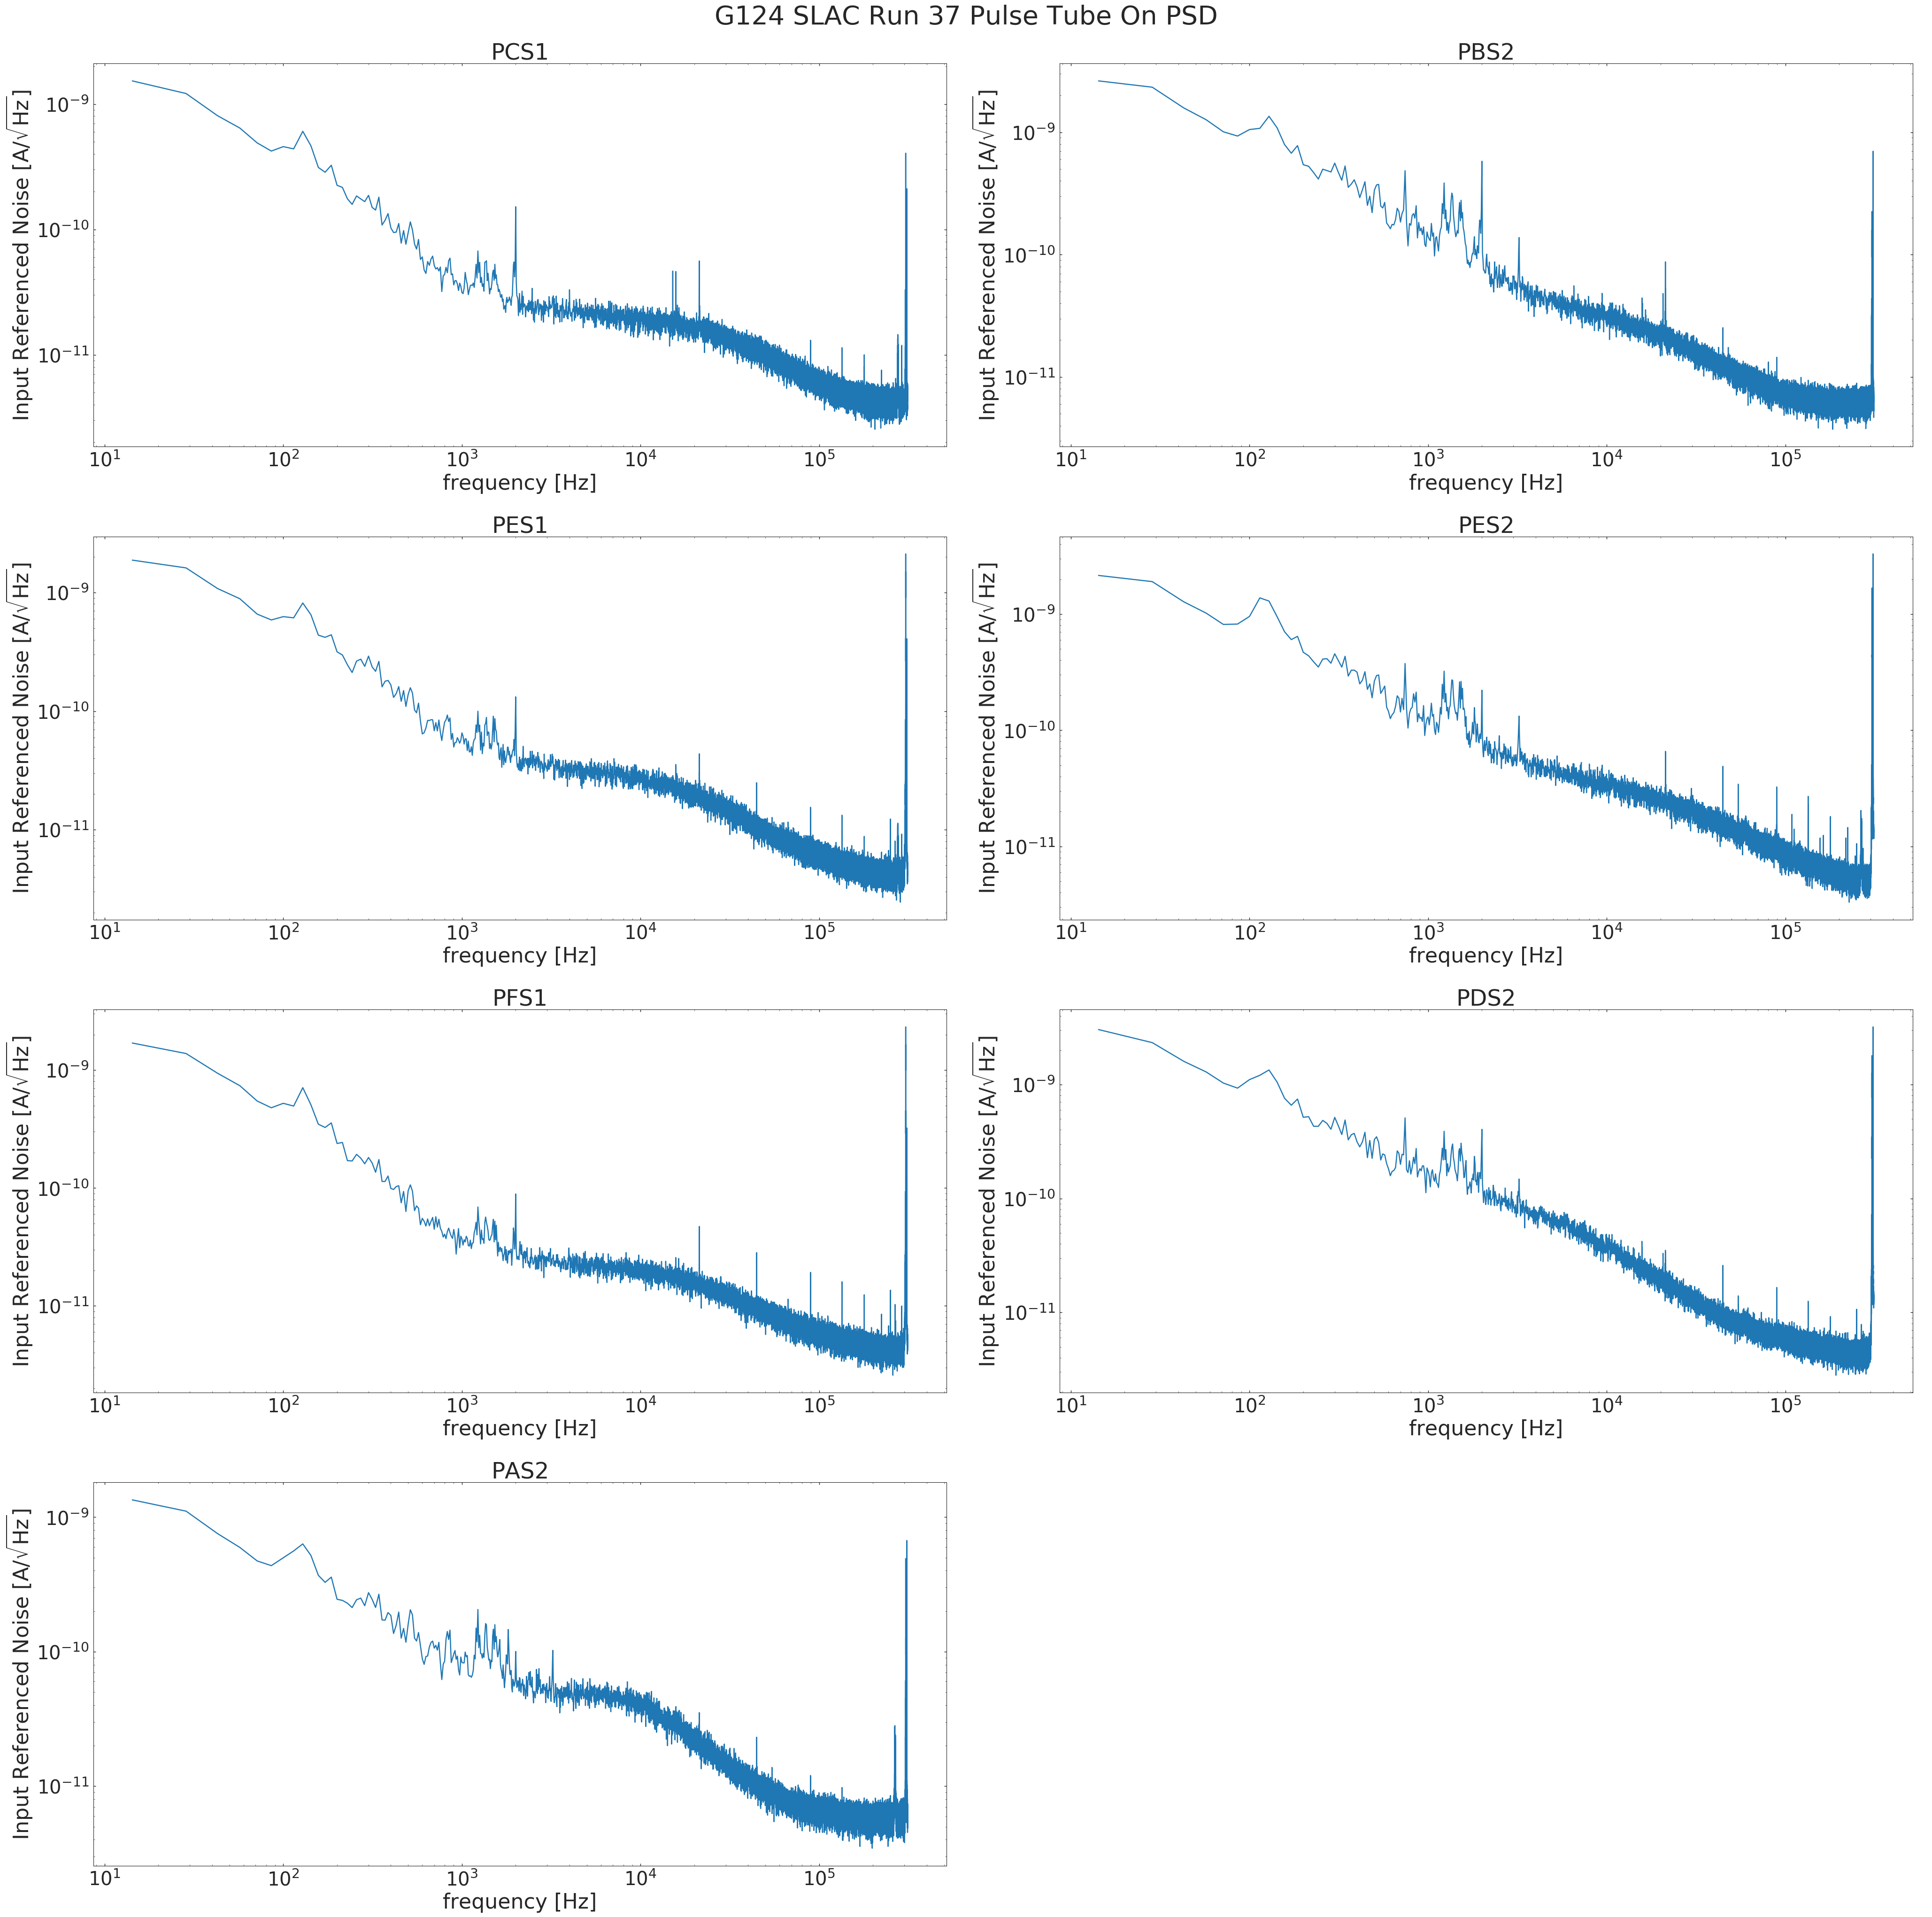

In [15]:
sns.set_context('notebook', font_scale=2.9)
g124_noise.plot_psd(lgcoverlay=False)


In [8]:
#g124_noise = load_noise(saveName)




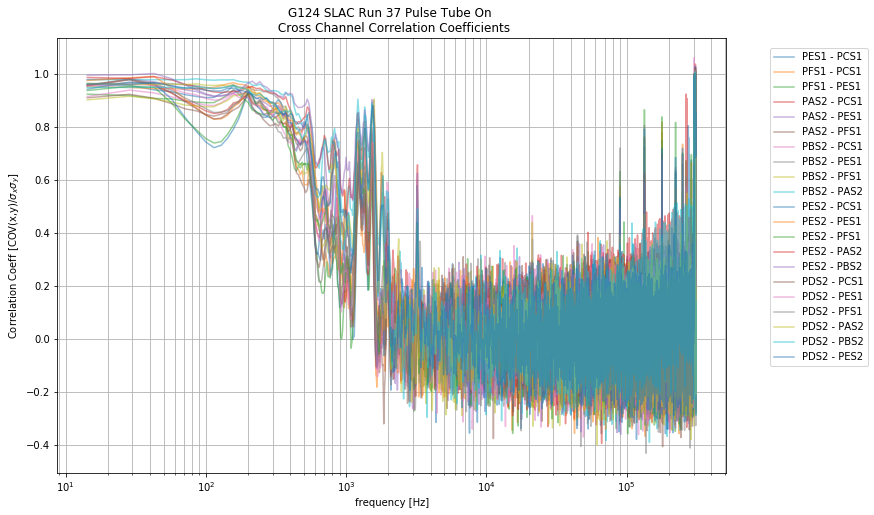

In [7]:
g124_noise.plot_corrcoeff(lgcsave=False, lgcsmooth=True, nwindow=13 )

## Plot a few CSDs

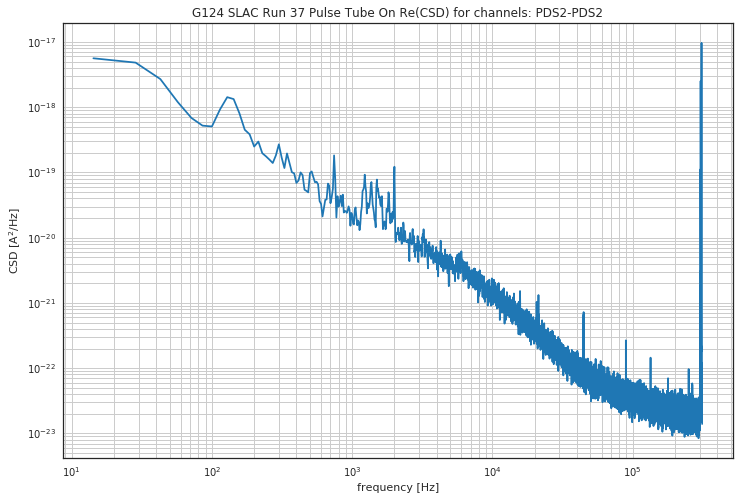

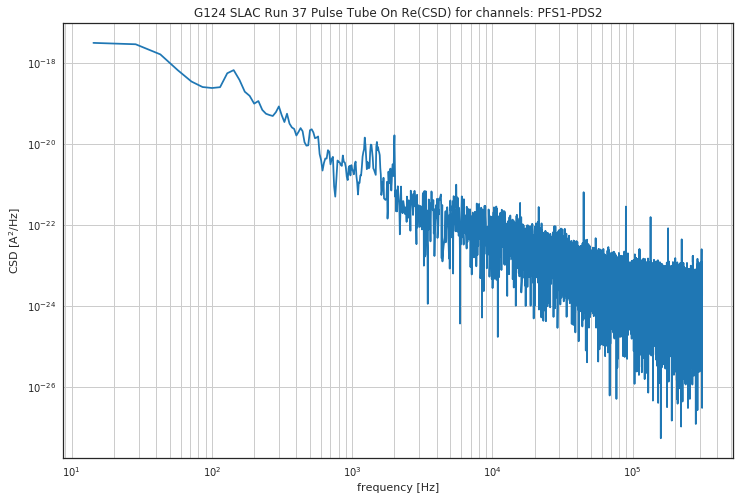

In [12]:
g124_noise.plot_csd(whichcsd=['66','26'])

### Try to plot a CSD for a non existant channel

In [13]:
g124_noise.plot_csd(whichcsd=['68'])

index out of range


### Try to save a figure with a bad path

Invalid save path. Figure not saved


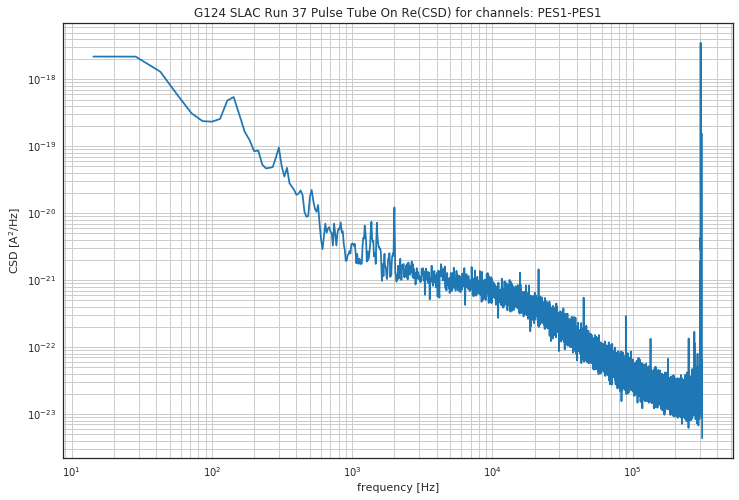

In [14]:
g124_noise.plot_csd(whichcsd=['11'], lgcsave=True, savepath = 'yay/python/is/great')

## Plot Real vs Imaginary PSDs

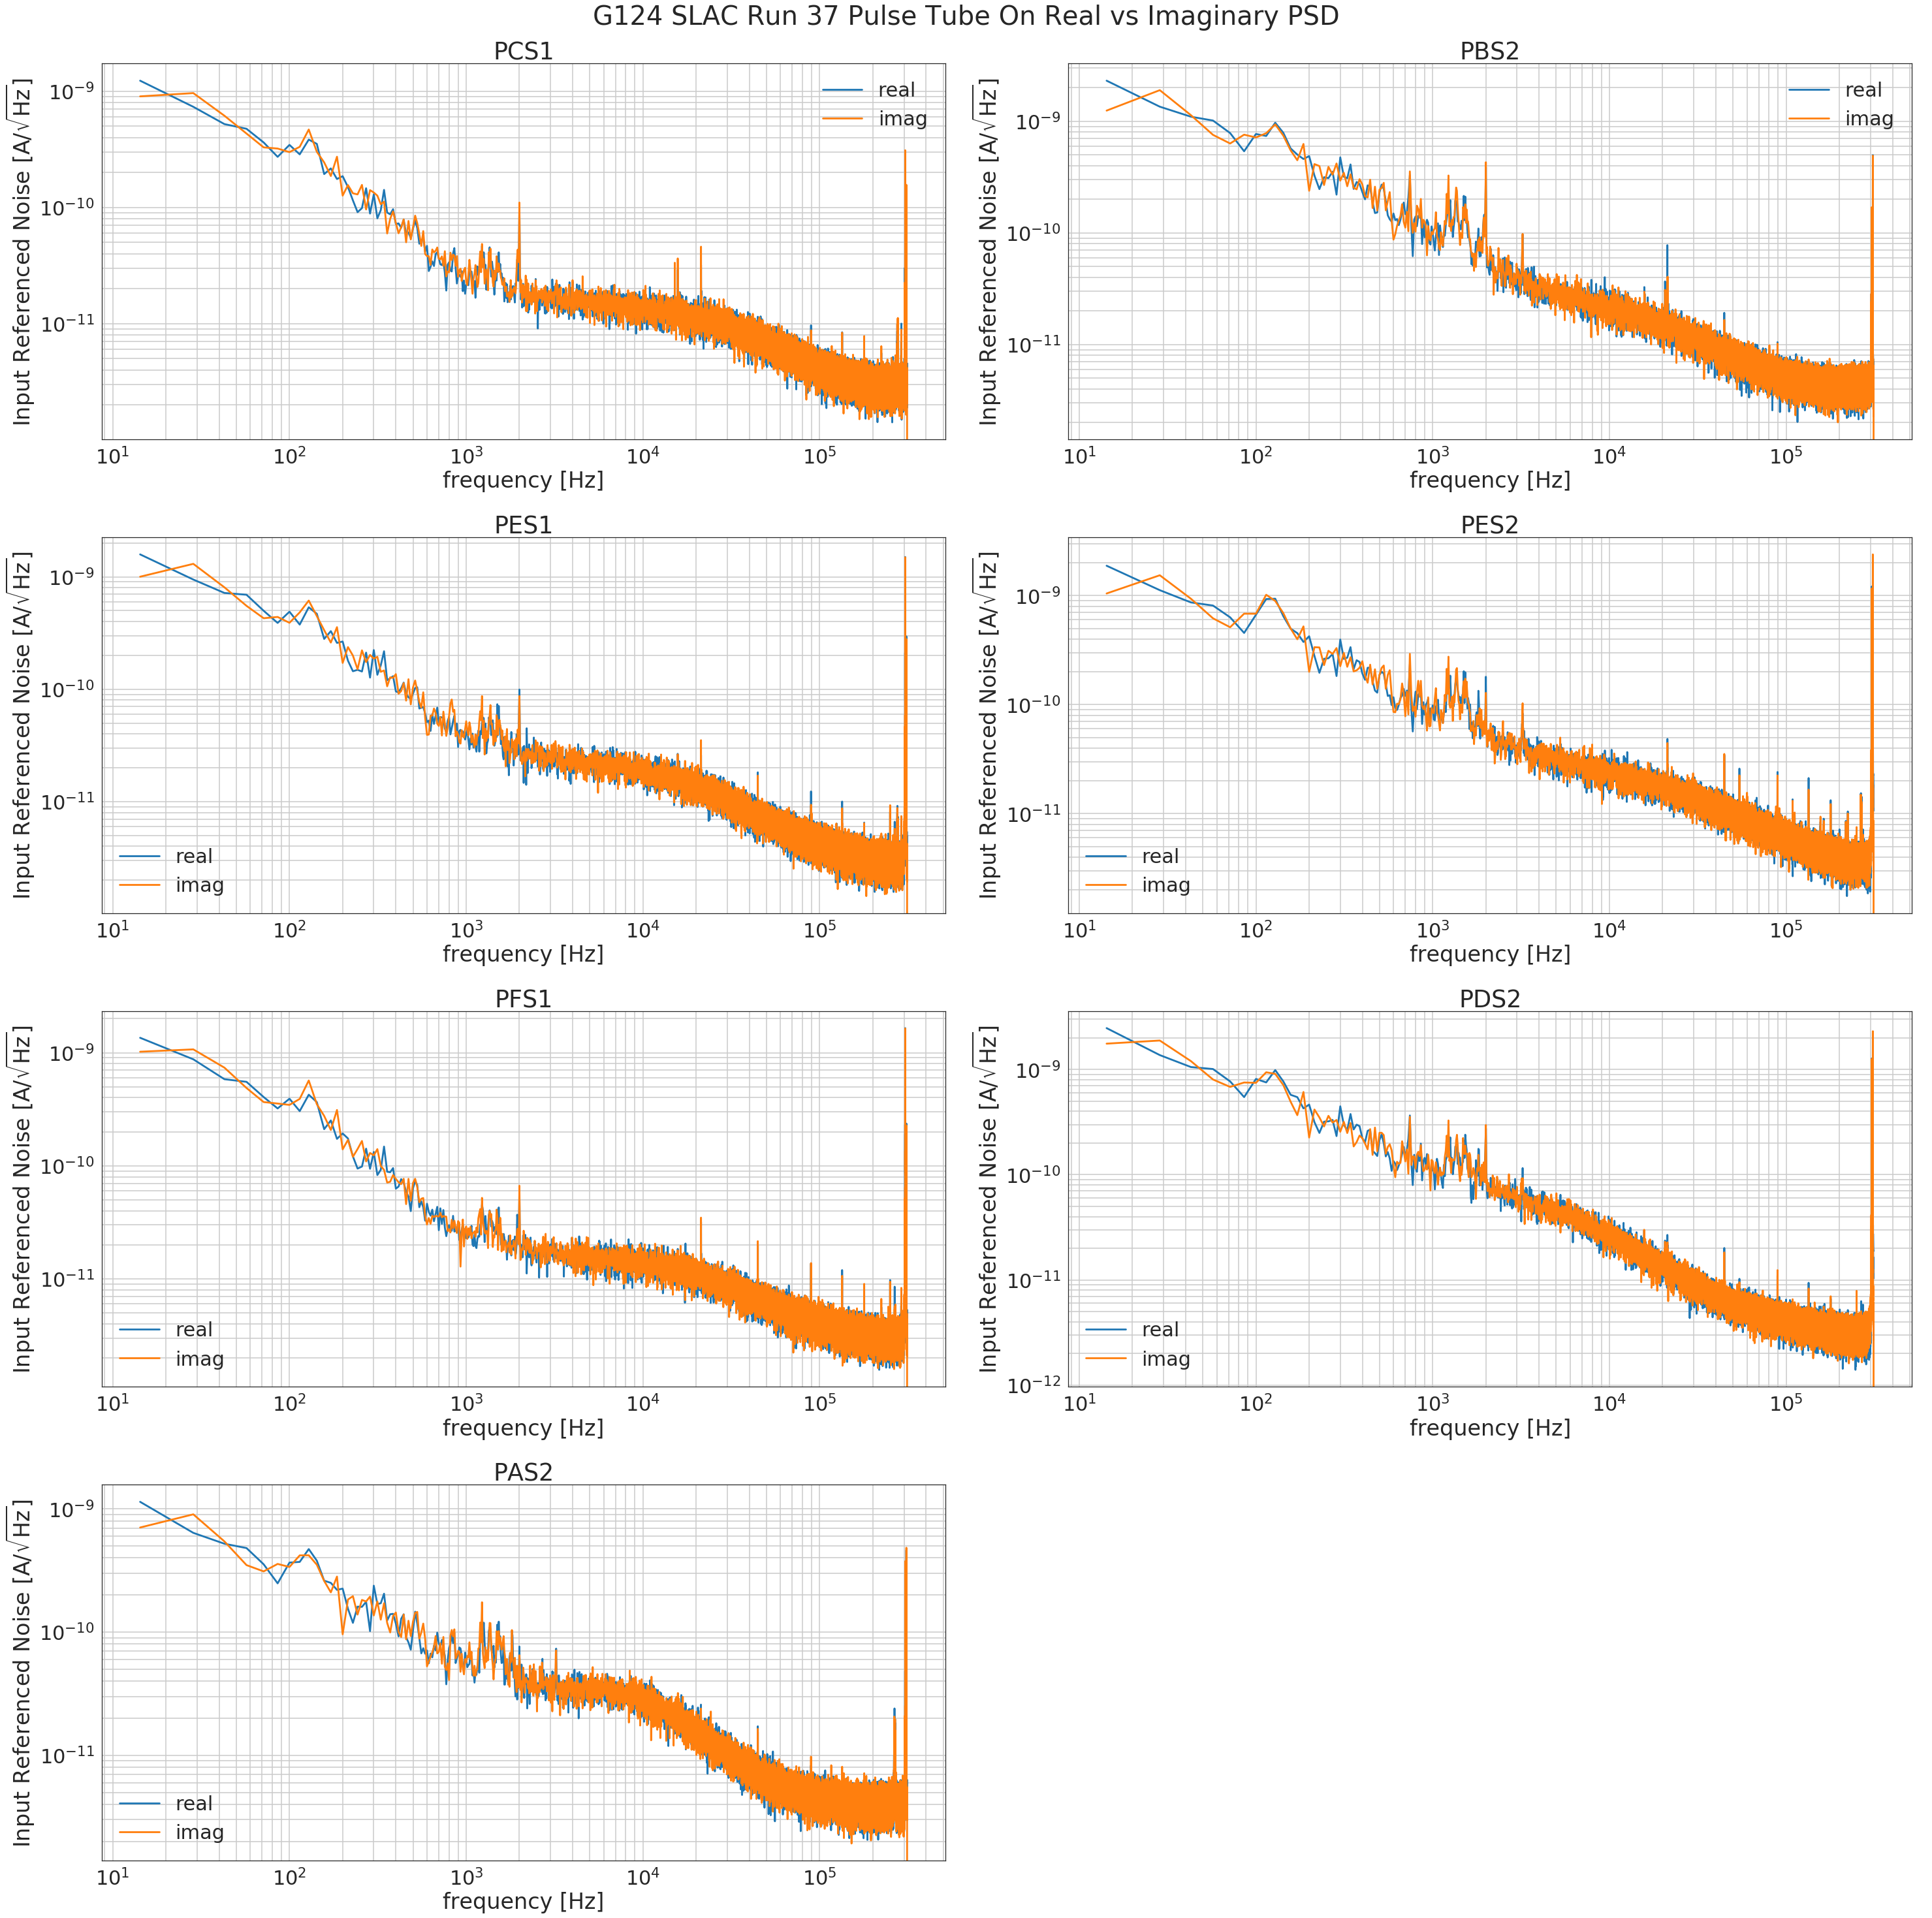

In [15]:
g124_noise.plot_reim_psd()

## Plot unCorrelated part of the noise PSD

In [ ]:

g124_noise.plot_decorrelatednoise(lgccorrelated=True,lgcsum = True, lgcsave=False)

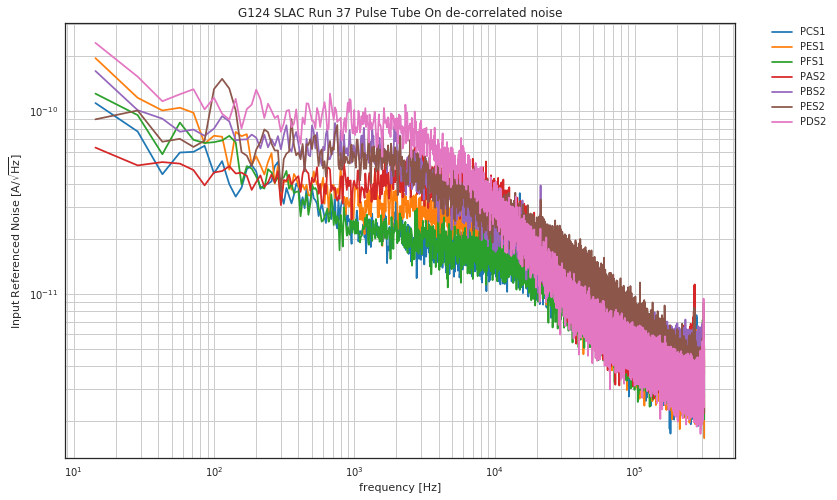

In [17]:
g124_noise.plot_decorrelatednoise(lgcoverlay = True)

## Test noise comparison plotting

### import traces, create new noise object and calculate PSD

In [18]:
#traces_PT_off = np.load(pathToTraces+'noise_traces_PT_off.npy')
#PT_off_noise = Noise(traces_PT_off, sampleRate, channels, name = 'G124 SLAC Run 37 Pulse Tube Off')
#PT_off_noise.calculate_psd()

In [19]:
#compare_noise(np.array([g124_noise,PT_off_noise]),g124_noise.channames)

## Create noise simulation object

In [20]:
#importlib.reload(noise_utils)
noise_sim = TESnoise(freqs = g124_noise.freqs[1:])

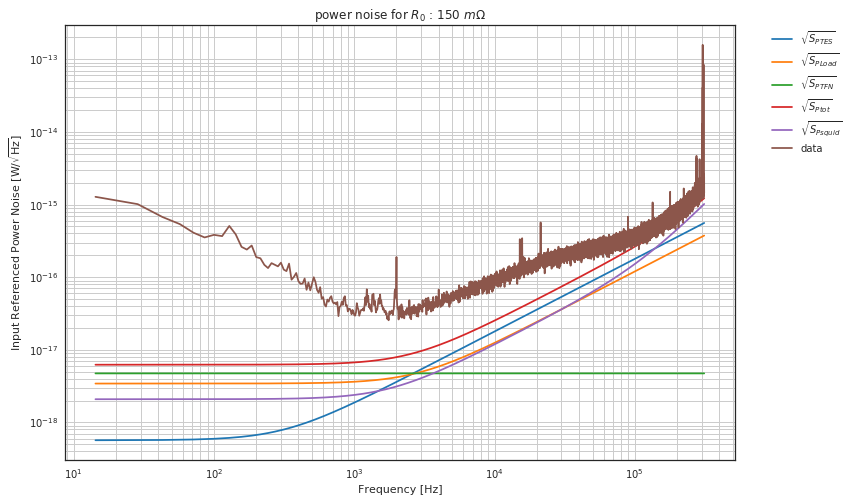

(<matplotlib.figure.Figure at 0x7f7649168cc0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f764916c2b0>)

In [21]:
plot_noise_sim(g124_noise.freqs, g124_noise.psd[0,:], noise_sim, istype='power')